In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("use_this.csv")

In [5]:
flooring = df["Flooring"]
flooring

0             Wood, Tile
1         Tile, Laminate
2       Hardwood, Marble
3         Tile, Hardwood
4         Tile, Laminate
              ...       
8947      Hardwood, Tile
8948         Wood, Vinyl
8949            Hardwood
8950    Carpet, Hardwood
8951          Tile, Wood
Name: Flooring, Length: 8952, dtype: object

In [6]:
types_of_flooring = set()
for row in flooring:
    lst = row.split(", ")
    for floor_type in lst:
        types_of_flooring.add(floor_type)
        
print(len(types_of_flooring))
types_of_flooring
    

41


{'Adobe',
 'Bamboo',
 'Brick',
 'Carpet',
 'Cement',
 'Ceramic Tile',
 'Concrete',
 'Cork',
 'Engineered Wood',
 'Granite',
 'Hardwood',
 'Hardwood Flrs Throughout',
 'Laminate',
 'Laminated',
 'Linoleum',
 'Linoleum / Vinyl',
 'Linoleum/Vinyl',
 'Marble',
 'Mexican Tile',
 'Mixed',
 'Other',
 'Other - See Remarks',
 'Other / Wood accents',
 'Other-Attch',
 'Other-Rmks',
 'Painted/Stained',
 'Parquet',
 'Partial Carpet',
 'Porcelain',
 'See Remarks',
 'Simulated Wood',
 'Slate',
 'Stone',
 'Stone Tile',
 'Tile',
 'Travertine',
 'Unfinished',
 'Vinyl',
 'Vinyl / Linoleum',
 'Vinyl/Linoleum',
 'Wood'}

In [8]:
floor_set = {"Adobe", "Bamboo", "Brick", "Carpet", "Cork", "Engineered Wood", "Granite", "Hardwood", 
                 "Laminate", "Linoleum", "Marble", "Mixed", "Other", "Parquet", "Porcelain", "Slate",
                 "Stone", "Tile", "Travertine", "Unfinished", "Vinyl", "Wood"}

floor_df = pd.DataFrame(columns=list(floor_set))
floor_df

,Adobe,Laminate,Tile,Bamboo,Wood,Carpet,Linoleum,Slate,Hardwood,Other,...,Travertine,Porcelain,Stone,Marble,Cork,Engineered Wood,Unfinished,Brick,Mixed,Vinyl


In [12]:
for row in flooring:
    floors = []
    for floor in floor_set:
        if floor in row:
            floors.append(1)
        else:
            floors.append(0)

    floor_df.loc[len(floor_df.index)] = floors

    
floor_df
    

,Adobe,Laminate,Tile,Bamboo,Wood,Carpet,Linoleum,Slate,Hardwood,Other,...,Travertine,Porcelain,Stone,Marble,Cork,Engineered Wood,Unfinished,Brick,Mixed,Vinyl
8952,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8948,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8949,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8950,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
combined_df = pd.concat([floor_df, df["Listed Price"]], axis=1, join="inner")
combined_df
#print(df["Listed Price"].shape)
#print(floor_df.shape)
#df["Listed Price"]

,Adobe,Laminate,Tile,Bamboo,Wood,Carpet,Linoleum,Slate,Hardwood,Other,...,Porcelain,Stone,Marble,Cork,Engineered Wood,Unfinished,Brick,Mixed,Vinyl,Listed Price
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1428000.0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2390000.0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1499000.0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1098000.0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,838000.0
8948,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,439000.0
8949,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,875000.0
8950,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2569000.0


<AxesSubplot:>

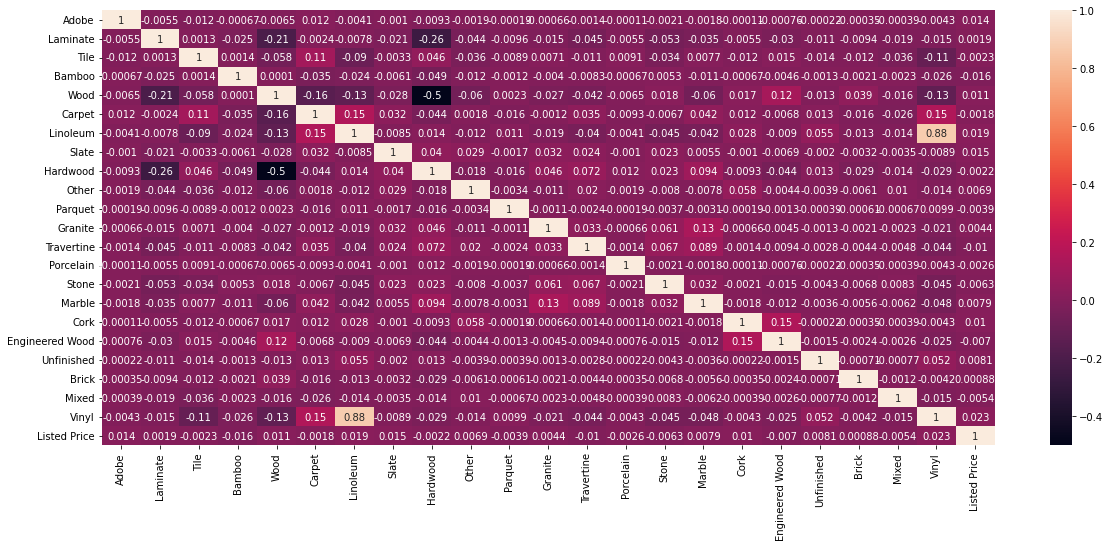

In [27]:
plt.figure(figsize = (20,8))
sns.heatmap(combined_df.corr(), annot=True)

## No Correlations